In [6]:
import torchvision as tv
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
from torch.utils.data import DataLoader
import pytorch_lightning as pl

In [7]:
show = to_pil_image

In [8]:
from amoug import AmougRCNNModel, AmougDataset, collate_fn, visualize

In [9]:
ds = AmougDataset("test_data", transform=tv.transforms.Compose([
    transforms.RandomOrder([
        transforms.ColorJitter(brightness=0.5, hue=0.5, contrast=0.5),
        transforms.RandomApply([transforms.ElasticTransform(alpha=100.)]),
        transforms.RandomGrayscale(),
        transforms.GaussianBlur(kernel_size=9),
    ]),
    to_tensor
]))
data = DataLoader(ds, batch_size=4, num_workers=12, collate_fn=collate_fn)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb6929a6710>
Traceback (most recent call last):
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1430, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/multiprocessing/popen_fork.py", line 45, in wait
    if not wait([self.sentinel], timeout):
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/multiprocessing/connection.py", line 921, in wait
    ready = selector.select(timeout)
  File "/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/selectors.py", lin

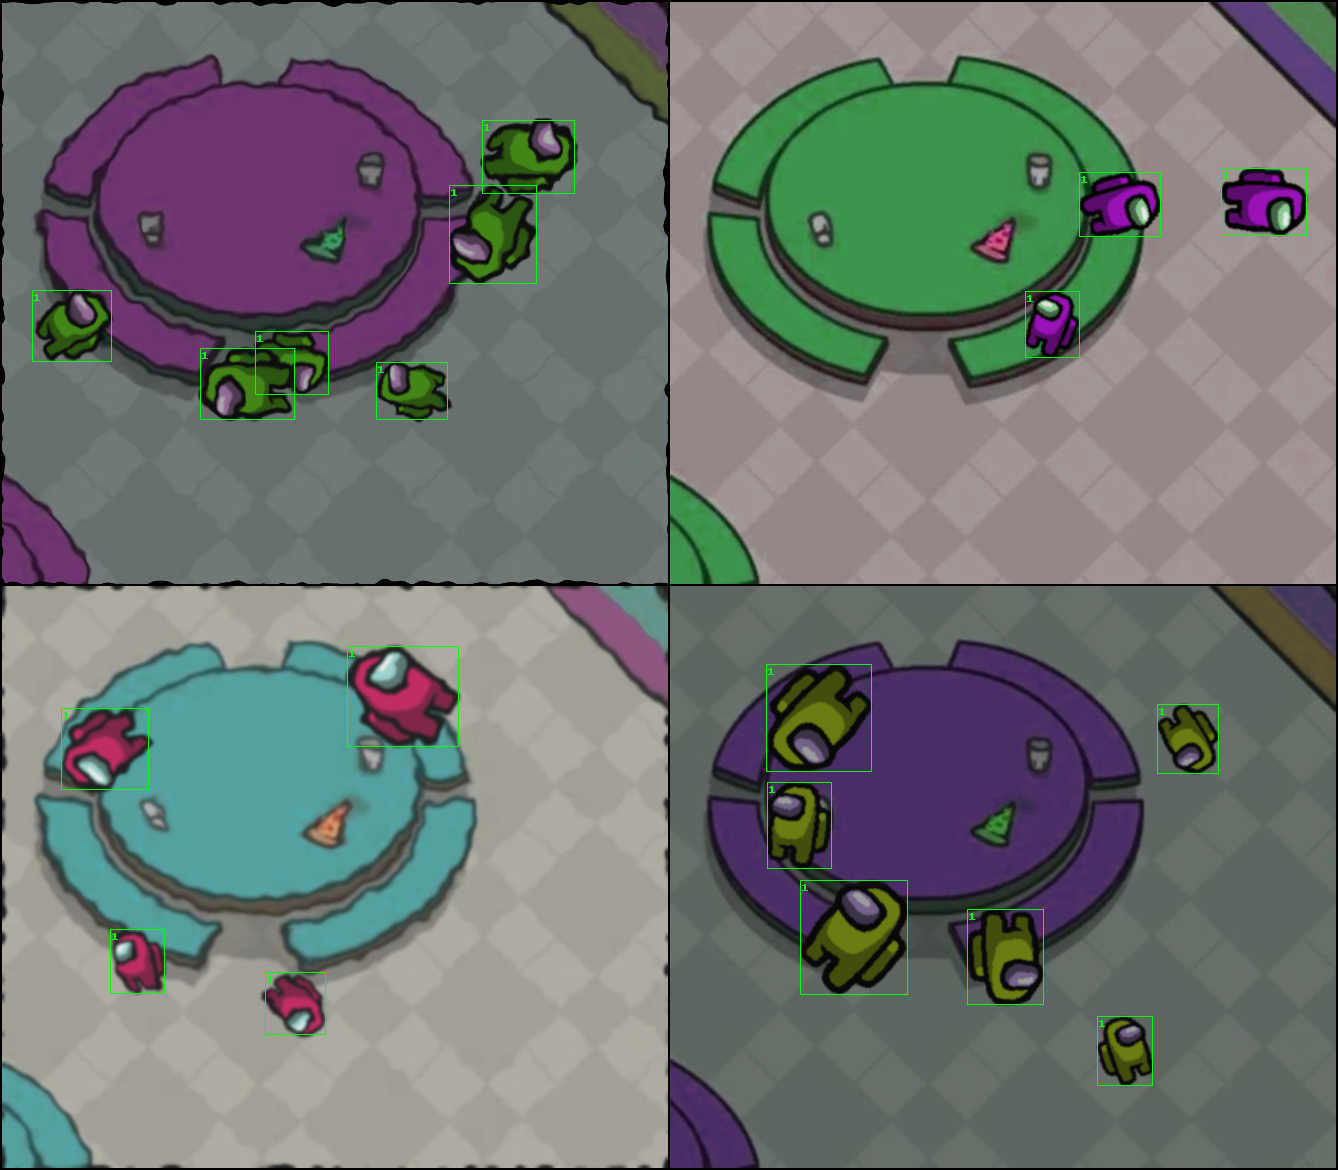

In [11]:
show(visualize(*next(iter(data))))

In [ ]:
trainer = pl.Trainer(accelerator="gpu")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
model_paths = ["FR_trained_sample.ckpt", "FR-v2-d1000.ckpt", "FR-v2-d1000v2.ckpt"]

In [ ]:
for model_path in model_paths:
    print(f"MODEL={model_path}")
    model = AmougRCNNModel.load_from_checkpoint(model_path)
    model.freeze()
    print(trainer.validate(model, dataloaders=data))
    print(trainer.test(model, data))

MODEL=FR_trained_sample.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:03<00:00,  1.18it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.16431333124637604
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.16431333124637604}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:31<00:00,  1.22s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.8527002334594727
     test_map:map_50          0.9515060186386108
     test_map:map_75          0.9443562030792236
    test_map:map_large        0.8272457122802734
   test_map:map_medium        0.845755934715271
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9440000653266907
      test_map:mar_1         0.19894561171531677
     test_map:mar_10          0.8770430684089661
     test_map:mar_100         0.8774067163467407
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.8838701248168945
   test_map:mar_medium        0.8

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.13872599601745605
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.13872599601745605}]
Testing DataLoader 0: 100%|██████████| 75/75 [02:07<00:00,  1.70s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.8925188183784485
     test_map:map_50          0.9588281512260437
     test_map:map_75          0.9573685526847839
    test_map:map_large        0.8809595704078674
   test_map:map_medium        0.8850829005241394
  test_map:map_per_class             -1.0
    test_map:map_small        -0.937333345413208
      test_map:mar_1         0.20416699349880219
     test_map:mar_10          0.908564567565918
     test_map:mar_100         0.908564567565918
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.9143240451812744
   test_map:mar_medium        0.90

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.20878709852695465
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.20878709852695465}]
Testing DataLoader 0:  87%|████████▋ | 65/75 [01:23<00:12,  1.29s/it]None


/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
